In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
#import data
data=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Spam Email Detection - spam.csv")
print(data.head(10))

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6   ham  Even my brother is not like to speak with me. ...        NaN   
7   ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8  spam  WINNER!! As a valued network customer you have...        NaN   
9  spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6        NaN  

In [3]:
#Data cleaning
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [4]:
data.rename(columns={'v1':'label','v2':'Message'},inplace=True)

In [5]:
print(data.head(10))

  label                                            Message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


In [6]:
data['label']=data['label'].map({'ham':0,'spam':1})

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   Message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [8]:
data.notnull().sum()

label      5572
Message    5572
dtype: int64

In [9]:
data.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
ps=PorterStemmer()

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
def cleaned_text(text):
    text=text.lower() #change each text into lower case
    text=re.sub(r'[^a-z]',' ',text)
    words=text.split()
    filtered_words=[]
    for word in words:
        if word not in stopwords.words('english'):
            stemmed_word=ps.stem(word)
            filtered_words.append(stemmed_word)
    return ' '.join(filtered_words)    
data['cleaned _message']=data['Message'].apply(cleaned_text)

In [13]:
data.head(5)

,label,Message,cleaned _message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [14]:
#turn cleaned_message into numbers
tfid=TfidfVectorizer()
x=tfid.fit_transform(data['cleaned _message']).toarray()

In [15]:
y=data['label']

In [16]:
#splitting for model test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
#creating model
model=MultinomialNB()

In [18]:
model.fit(x_train,y_train)

MultinomialNB()

In [19]:
#make prediction on the test data
y_pred=model.predict(x_test)

In [20]:
#accuracy
accuracy=accuracy_score(y_test,y_pred)
print(f" Accuracy:{accuracy}")

 Accuracy:0.9659192825112107


In [21]:
#confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix/n",cm)

Confusion Matrix/n [[965   0]
 [ 38 112]]


In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [23]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()

In [24]:
lr_model.fit(x_train,y_train)
y_pred_lr=lr_model.predict(x_test)

In [76]:
cm=confusion_matrix(y_test,y_pred_rf)
print("Confusion Matrix/n",cm)

Confusion Matrix/n [[965   0]
 [ 23 127]]


In [56]:
print("Logistic Regression:\n",classification_report(y_test,y_pred_lr))
print("Random Forest:\n",classification_report(y_test,y_pred_rf))
      

Logistic Regression:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.96      0.69      0.81       150

    accuracy                           0.96      1115
   macro avg       0.96      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115

Random Forest:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



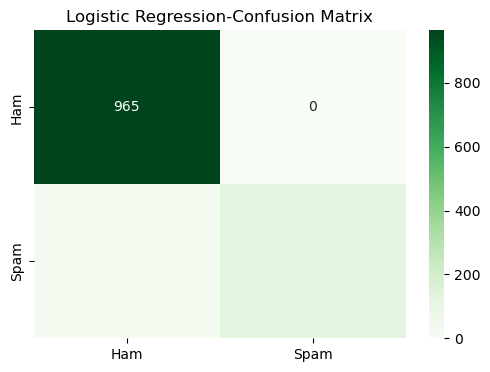

In [74]:
cm=confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm,fmt='d',annot=True,cmap='Greens',xticklabels=['Ham','Spam'],yticklabels=['Ham','Spam'])
plt.title("Logistic Regression-Confusion Matrix")
plt.show()